# Capstone report

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.api as sms
import math

## Exploratory Data Analysis

### 1. National Statistics on Income and Life Expectancy

In [2]:
tb1 = pd.read_csv('table_1.csv', index_col=None)

In [3]:
tb1_M = tb1[tb1.gnd == 'M']
tb1_F = tb1[tb1.gnd == 'F']

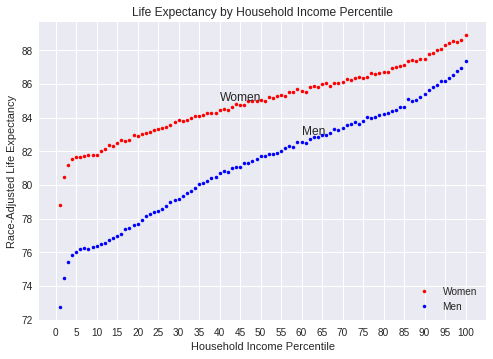

In [4]:
# Life expectancy vs. Household Income Percentile By Gender at Age 40
plot1 = plt.plot(tb1_F.pctile, tb1_F.le_raceadj, 'r.', label='Women')
plot2 = plt.plot(tb1_M.pctile, tb1_M.le_raceadj, 'b.', label='Men')
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Household Income Percentile')
plt.text(40, 85, 'Women')
plt.text(60, 83, 'Men')
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 105, 5))
plt.show()

In [5]:
# Life expectancy gap of bottom and top 1% 
le_F_b = tb1_F[tb1_F.pctile==1].le_raceadj.iloc[0]
print('Women, Bottom 1%:', round(le_F_b,1))
le_F_t = tb1_F[tb1_F.pctile==100].le_raceadj.iloc[0]
print('Women, Top 1%:', round(le_F_t,1))
diff_F = le_F_t - le_F_b
print('Women, Life expectancy gap:', round(diff_F,1))
le_M_b = tb1_M[tb1_M.pctile==1].le_raceadj.iloc[0]
print('Men, Bottom 1%:', round(le_M_b,1))
le_M_t = tb1_M[tb1_M.pctile==100].le_raceadj.iloc[0]
print('Men, Top 1%:', round(le_M_t,1))
diff_M = le_M_t - le_M_b
print('Men, Life expectancy gap:', round(diff_M,1))

Women, Bottom 1%: 78.8
Women, Top 1%: 88.9
Women, Life expectancy gap: 10.1
Men, Bottom 1%: 72.7
Men, Top 1%: 87.3
Men, Life expectancy gap: 14.6


In [6]:
# Gender gap in Life expectancy
gap_b = le_F_b - le_M_b
print('Gender gap, Bottom 1%:', round(gap_b,1))
gap_t = le_F_t - le_M_t
print('Gender gap, Top 1%:', round(gap_t,1))

Gender gap, Bottom 1%: 6.0
Gender gap, Top 1%: 1.5


In [7]:
# Slope of linear regression
# linear regression of females
slope_F, intercept, r_value, p_value, std_err = st.linregress(tb1_F.pctile, tb1_F.le_raceadj)
print('Women, Slope of linear regression:', round(slope_F,2))
# linear regression of males
slope_M, intercept, r_value, p_value, std_err = st.linregress(tb1_M.pctile, tb1_M.le_raceadj)
print('Men, Slope of linear regression:', round(slope_M,2))

Women, Slope of linear regression: 0.07
Men, Slope of linear regression: 0.11


### 2. Trends in Life expectancy, 2001~2014

In [8]:
tb2 = pd.read_csv('table_2.csv', index_col=None)

In [9]:
tb2_m = tb2[tb2.gnd == 'M']
tb2_f = tb2[tb2.gnd == 'F']

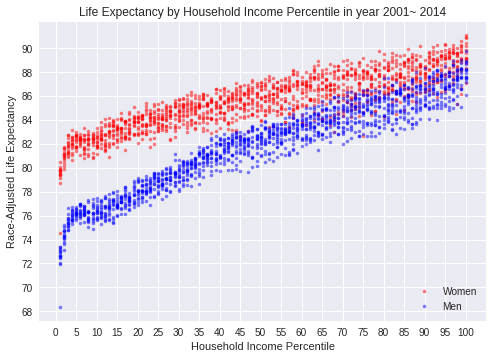

In [10]:
# Life expectancy vs. Household Income Percentile in year 2001~2014 By Gender at Age 40
#tb2_f.plot(kind='scatter', x='pctile', y='le_raceadj', marker='.')
plot1 = plt.plot(tb2_f.pctile, tb2_f.le_raceadj, 'r.', label='Women', alpha=0.5)
plot2 = plt.plot(tb2_m.pctile, tb2_m.le_raceadj, 'b.', label='Men', alpha=0.5)
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Household Income Percentile in year 2001~ 2014')
plt.legend(loc='lower right')
plt.xticks(np.arange(0, 105, 5))
plt.yticks(np.arange(68, 92, 2))
plt.show()

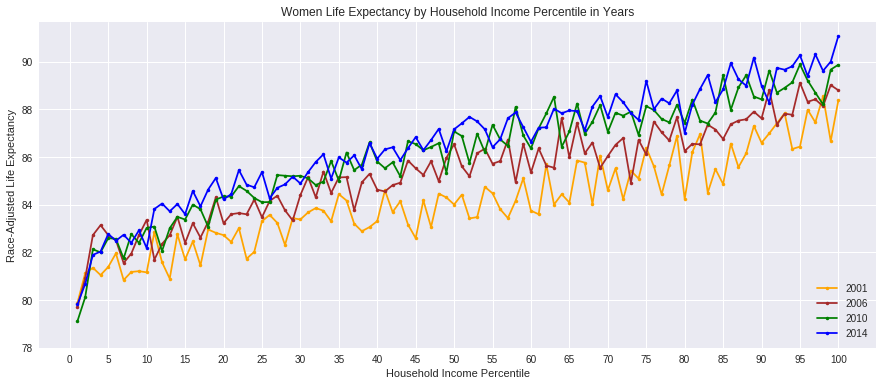

In [11]:
# Life expectancy of females in year 2001~2014 
tb2_f_2001 = tb2_f[tb2_f.year==2001]
tb2_f_2006 = tb2_f[tb2_f.year==2006]
tb2_f_2010 = tb2_f[tb2_f.year==2010]
tb2_f_2014 = tb2_f[tb2_f.year==2014]
plot1 = plt.plot(tb2_f_2001.pctile, tb2_f_2001.le_raceadj, color='orange', marker='.', label='2001')
plot2 = plt.plot(tb2_f_2006.pctile, tb2_f_2006.le_raceadj, color='brown', marker='.', label='2006')
plot3 = plt.plot(tb2_f_2010.pctile, tb2_f_2010.le_raceadj, color='green', marker='.', label='2010')
plot4 = plt.plot(tb2_f_2014.pctile, tb2_f_2014.le_raceadj, color='blue', marker='.', label='2014')
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Women Life Expectancy by Household Income Percentile in Years')
plt.xticks(np.arange(0, 105, 5))
plt.yticks(np.arange(78, 92, 2))
plt.legend(loc='lower right')
plt.show()

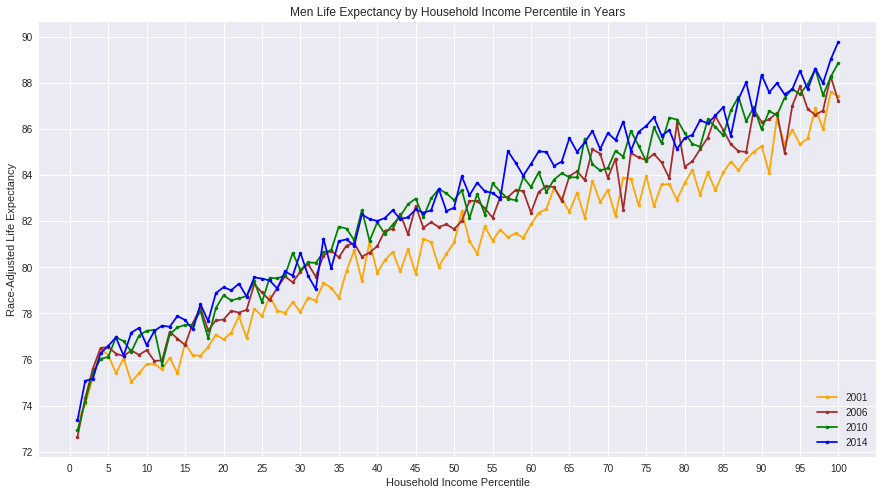

In [12]:
# Life expectancy of females in year 2001~2014 
tb2_m_2001 = tb2_m[tb2_m.year==2001]
tb2_m_2006 = tb2_m[tb2_m.year==2006]
tb2_m_2010 = tb2_m[tb2_m.year==2010]
tb2_m_2014 = tb2_m[tb2_m.year==2014]
plot1 = plt.plot(tb2_m_2001.pctile, tb2_m_2001.le_raceadj, color='orange', marker='.', label='2001')
plot2 = plt.plot(tb2_m_2006.pctile, tb2_m_2006.le_raceadj, color='brown', marker='.', label='2006')
plot3 = plt.plot(tb2_m_2010.pctile, tb2_m_2010.le_raceadj, color='green', marker='.', label='2010')
plot4 = plt.plot(tb2_m_2014.pctile, tb2_m_2014.le_raceadj, color='blue', marker='.', label='2014')
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Men Life Expectancy by Household Income Percentile in Years')
plt.xticks(np.arange(0, 105, 5))
plt.yticks(np.arange(72, 92, 2))
plt.legend(loc='lower right')
plt.show()

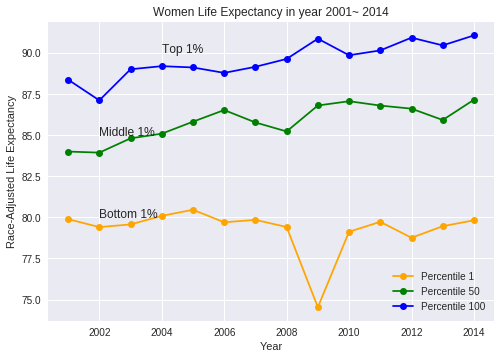

In [13]:
# Life expectancy of females in year 2001~2014 
tb2_f_1 = tb2_f[tb2_f.pctile==1]
tb2_f_50 = tb2_f[tb2_f.pctile==50]
tb2_f_100 = tb2_f[tb2_f.pctile==100]
plot1 = plt.plot(tb2_f_1.year, tb2_f_1.le_raceadj, color='orange', marker='o', label='Percentile 1')
plot2 = plt.plot(tb2_f_50.year, tb2_f_50.le_raceadj, color='green', marker='o', label='Percentile 50')
plot3 = plt.plot(tb2_f_100.year, tb2_f_100.le_raceadj, color='blue', marker='o', label='Percentile 100')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Women Life Expectancy in year 2001~ 2014')
plt.annotate('Bottom 1%', xy=(2002,80))
plt.annotate('Middle 1%', xy=(2002,85))
plt.annotate('Top 1%', xy=(2004,90))
#plt.text(2003, 81, 'Bottom 1%')
#plt.text(2002, 85, 'Middle 1%')
#plt.text(2004, 89, 'Top 1%')
plt.legend(loc='lower right')
plt.show()

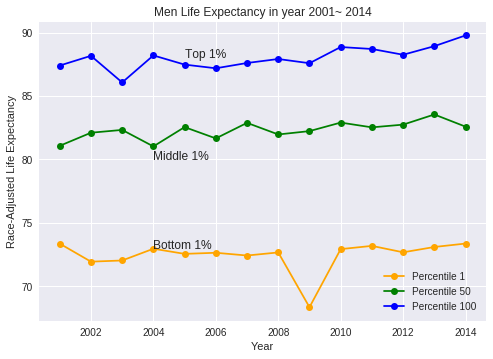

In [14]:
# Life expectancy of males in year 2001~2014 
tb2_m_1 = tb2_m[tb2_m.pctile==1]
tb2_m_50 = tb2_m[tb2_m.pctile==50]
tb2_m_100 = tb2_m[tb2_m.pctile==100]
plot1 = plt.plot(tb2_m_1.year, tb2_m_1.le_raceadj, color='orange', marker='o', label='Percentile 1')
plot2 = plt.plot(tb2_m_50.year, tb2_m_50.le_raceadj, color='green', marker='o', label='Percentile 50')
plot3 = plt.plot(tb2_m_100.year, tb2_m_100.le_raceadj, color='blue', marker='o', label='Percentile 100')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Men Life Expectancy in year 2001~ 2014')
plt.annotate('Bottom 1%', xy=(2004,73))
plt.annotate('Middle 1%', xy=(2004,80))
plt.annotate('Top 1%', xy=(2005,88))
#plt.text(2004, 73, 'Bottom 1%')
#plt.text(2004, 80, 'Middle 1%')
#plt.text(2005, 88, 'Top 1%')
plt.legend(loc='lower right')
plt.show()

In [15]:
# How are gaps in life expectancy changing over time?
gtb2_f = tb2_f.groupby('year')
le_gap_f = gtb2_f.le_raceadj.max() - gtb2_f.le_raceadj.min()
gtb2_m = tb2_m.groupby('year')
le_gap_m = gtb2_m.le_raceadj.max() - gtb2_m.le_raceadj.min()

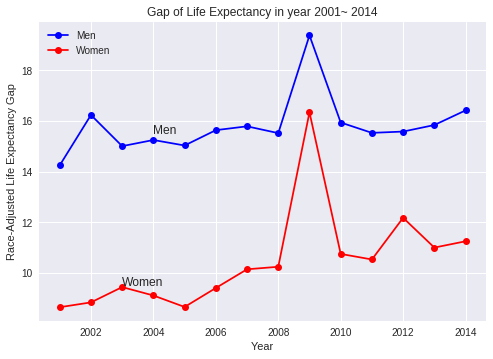

In [16]:
# Gap of Life expectancy vs. year By Gender in 2001~ 2014
plot1 = plt.plot(le_gap_m, color='blue', marker='o', label='Men')
plot2 = plt.plot(le_gap_f, color='red', marker='o', label='Women')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy Gap')
plt.title('Gap of Life Expectancy in year 2001~ 2014')
plt.text(2004, 15.5, 'Men')
plt.text(2003, 9.5, 'Women')
plt.legend(loc='upper left')
plt.show()

### 3. Local Area Variation of Life expectancy gaps

#### State level variation of life expectancy

In [17]:
tb3 = pd.read_csv('table_3.csv', index_col=None)

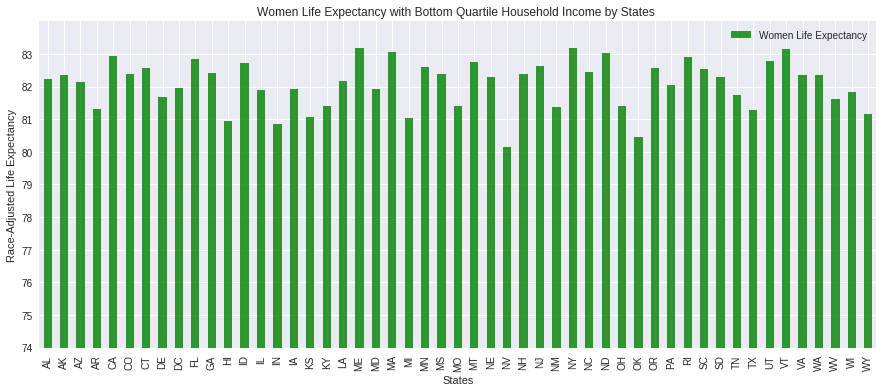

In [18]:
# Women Life Expectancy with Bottom Quartile Household Income by States 
tb3.plot('stateabbrv', 'le_raceadj_q1_F', kind='bar', color='g', alpha=0.8, label='Women Life Expectancy')
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.xlabel('States')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Women Life Expectancy with Bottom Quartile Household Income by States ')
plt.ylim([74,84])
plt.yticks(np.arange(74, 84, 1))
plt.show()

In [19]:
# 5 states with the highest Women life expectancy
tb3.sort_values(by='le_raceadj_q1_F', ascending=False).reset_index()[['statename', 'stateabbrv', 'le_raceadj_q1_F']].head(5)

,statename,stateabbrv,le_raceadj_q1_F
0,Maine,ME,83.19597
1,New York,NY,83.17820
2,Vermont,VT,83.15334
3,Massachusetts,MA,83.06703
4,North Dakota,ND,83.01955


In [20]:
# 5 states with the lowest Women life expectancy
tb3.sort_values(by='le_raceadj_q1_F').reset_index()[['statename', 'stateabbrv', 'le_raceadj_q1_F']].head(5)

,statename,stateabbrv,le_raceadj_q1_F
0,Nevada,NV,80.16355
1,Oklahoma,OK,80.44940
2,Indiana,IN,80.85909
3,Hawaii,HI,80.95252
4,Michigan,MI,81.03877


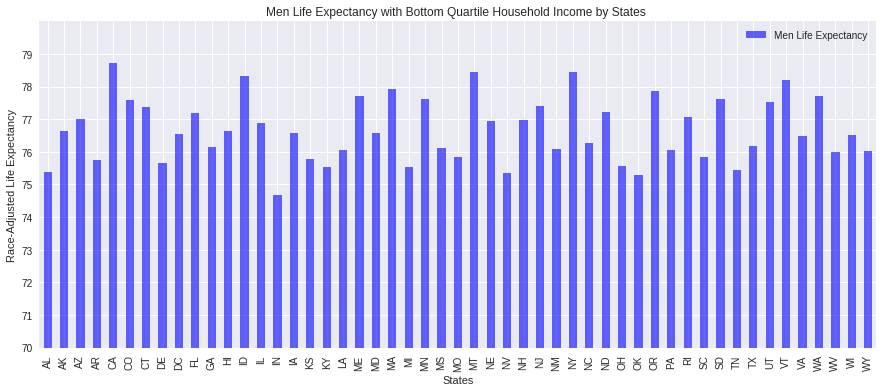

In [21]:
# Men Life Expectancy with Bottom Quartile Household Income by States 
tb3.plot('stateabbrv', 'le_raceadj_q1_M', kind='bar', color='b', alpha=0.6, label='Men Life Expectancy')
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.xlabel('States')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Men Life Expectancy with Bottom Quartile Household Income by States ')
plt.ylim([70,80])
plt.yticks(np.arange(70, 80, 1))
plt.show()

In [22]:
# 5 states with highest Men life expectancy
tb3.sort_values(by='le_raceadj_q1_M', ascending=False).reset_index()[['statename', 'stateabbrv', 'le_raceadj_q1_M']].head(5)

,statename,stateabbrv,le_raceadj_q1_M
0,California,CA,78.73162
1,New York,NY,78.45039
2,Montana,MT,78.44444
3,Idaho,ID,78.33078
4,Vermont,VT,78.20271


In [23]:
# 5 states with lowest Men life expectancy
tb3.sort_values(by='le_raceadj_q1_M').reset_index()[['statename', 'stateabbrv', 'le_raceadj_q1_M']].head(5)

,statename,stateabbrv,le_raceadj_q1_M
0,Indiana,IN,74.68581
1,Oklahoma,OK,75.28735
2,Nevada,NV,75.36532
3,Alabama,AL,75.37608
4,Tennessee,TN,75.43765


#### Women Life Expectancy with Quartile Household Income by States 

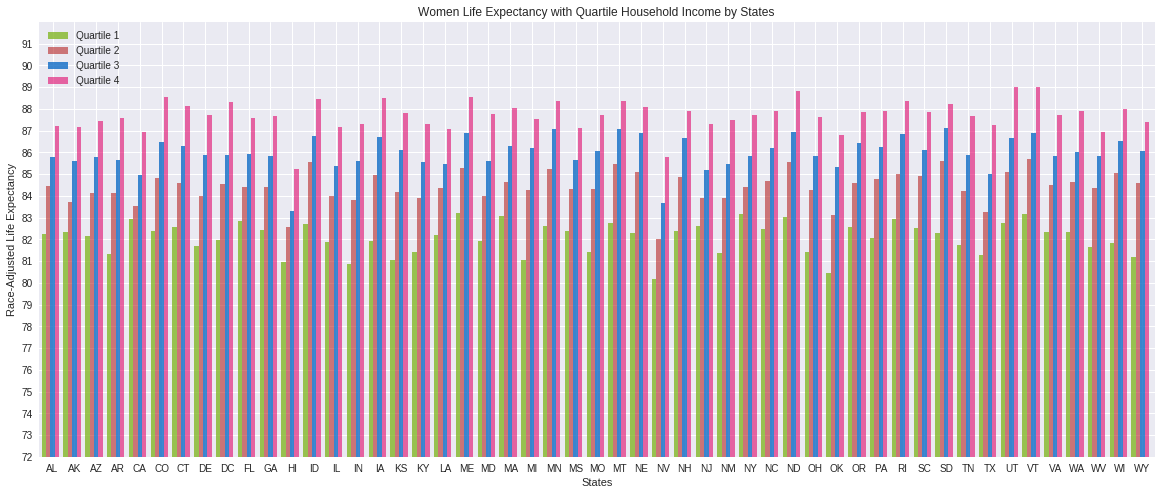

In [24]:
# Setting the positions and width for the bars
pos = list(range(len(tb3['stateabbrv'])))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,8))

# Create a bar with q1 data,
# in position pos,
plt.bar(pos,
        # using tb3['le_raceadj_q1_F'] data,
        tb3['le_raceadj_q1_F'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#83b726',
        # with label
        label='Quartile 1')

# Create a bar with q2 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        # using tb3['le_raceadj_q2_F'] data,
        tb3['le_raceadj_q2_F'],
        # of width
        width,
        # with alpha 0.6
        alpha=0.6,
        # with color
        color='#b72626',
        # with label
        label='Quartile 2')

# Create a bar with q3 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        # using tb3['le_raceadj_q3_F'] data,
        tb3['le_raceadj_q3_F'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#0e6bc5',
        # with label
        label='Quartile 3')

# Create a bar with q4 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos],
        # using tb3['le_raceadj_q4_F'] data,
        tb3['le_raceadj_q4_F'],
        # of width
        width,
        # with alpha 0.6
        alpha=0.6,
        # with color
        color='#e1076c',
        # with label
        label='Quartile 4')

# Set the x,y axis label
ax.set_xlabel('States')
ax.set_ylabel('Race-Adjusted Life Expectancy')

# Set the chart's title
ax.set_title('Women Life Expectancy with Quartile Household Income by States ')

# Set the position of the x ticks
ax.set_xticks([p + 2 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tb3['stateabbrv'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([72,92])
plt.yticks(np.arange(72, 92, 1))

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.show()

#### Men Life Expectancy with Quartile Household Income by States 

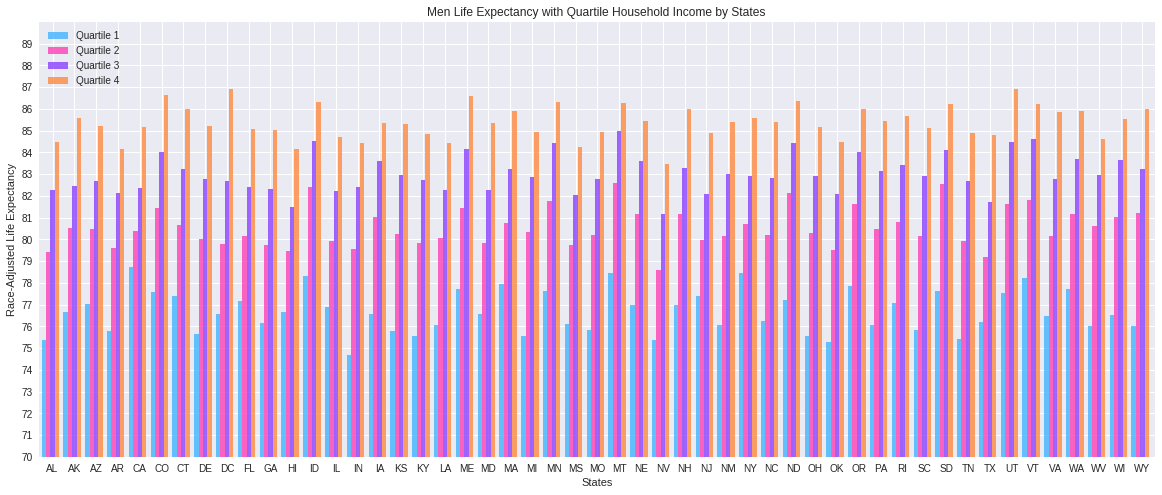

In [25]:
# Setting the positions and width for the bars
pos = list(range(len(tb3['stateabbrv'])))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,8))

# Create a bar with q1 data,
# in position pos,
plt.bar(pos,
        # using tb3['le_raceadj_q1_M'] data,
        tb3['le_raceadj_q1_M'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#40b5ff',
        # with label
        label='Quartile 1')

# Create a bar with q2 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        # using tb3['le_raceadj_q2_M'] data,
        tb3['le_raceadj_q2_M'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#ff40b5',
        # with label
        label='Quartile 2')

# Create a bar with q3 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        # using tb3['le_raceadj_q3_M'] data,
        tb3['le_raceadj_q3_M'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#8a40ff',
        # with label
        label='Quartile 3')

# Create a bar with q4 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos],
        # using tb3['le_raceadj_q4_M'] data,
        tb3['le_raceadj_q4_M'],
        # of width
        width,
        # with alpha 0.8
        alpha=0.8,
        # with color
        color='#ff8a40',
        # with label
        label='Quartile 4')

# Set the x,y axis label
ax.set_xlabel('States')
ax.set_ylabel('Race-Adjusted Life Expectancy')

# Set the chart's title
ax.set_title('Men Life Expectancy with Quartile Household Income by States ')

# Set the position of the x ticks
ax.set_xticks([p + 2 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tb3['stateabbrv'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([70,90])
plt.yticks(np.arange(70, 90, 1))

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.show()

#### Life Expectancy Gap by States

In [26]:
# Life expectancy gap between Quartile 4 and Quartile 1
tb3['gap_F'] = tb3['le_raceadj_q4_F']-tb3['le_raceadj_q1_F']
tb3['gap_M'] = tb3['le_raceadj_q4_M']-tb3['le_raceadj_q1_M']

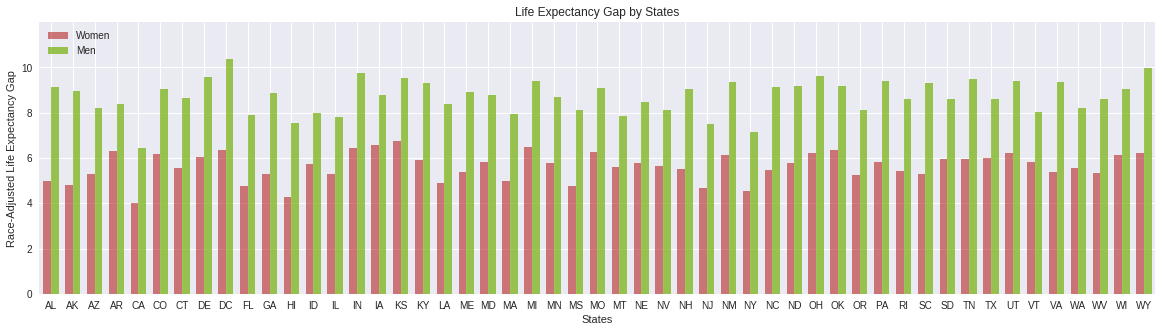

In [27]:
# Setting the positions and width for the bars
pos = list(range(len(tb3['stateabbrv'])))
width = 0.35

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

# Create a bar with women data,
# in position pos,
plt.bar(pos,
        tb3['gap_F'],
        width,
        alpha=0.6,
        color='#b72626',
        label='Women')

# Create a bar with men data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        tb3['gap_M'],
        width,
        alpha=0.8,
        color='#83b726',
        label='Men')

# Set the x,y axis label
ax.set_xlabel('States')
ax.set_ylabel('Race-Adjusted Life Expectancy Gap')

# Set the chart's title
ax.set_title('Life Expectancy Gap by States')

# Set the position of the x ticks
ax.set_xticks([p + width/2 for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tb3['stateabbrv'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0,12])
plt.yticks(np.arange(0, 12, 2))

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.show()

In [28]:
# 5 states with the highest Men life expectancy gap
tb3.sort_values(by='gap_M', ascending=False).reset_index()[['statename', 'stateabbrv', 'gap_M']].head(5)

,statename,stateabbrv,gap_M
0,District Of Columbia,DC,10.38028
1,Wyoming,WY,9.96908
2,Indiana,IN,9.74794
3,Ohio,OH,9.60021
4,Delaware,DE,9.56742


In [29]:
# 5 states with the highest Women life expectancy gap
tb3.sort_values(by='gap_F', ascending=False).reset_index()[['statename', 'stateabbrv', 'gap_F']].head(5)

,statename,stateabbrv,gap_F
0,Kansas,KS,6.73606
1,Iowa,IA,6.58660
2,Michigan,MI,6.49275
3,Indiana,IN,6.42861
4,Oklahoma,OK,6.35006


In [30]:
# 5 states with the lowest Men life expectancy gap
tb3.sort_values(by='gap_M').reset_index()[['statename', 'stateabbrv', 'gap_M']].head(5)

,statename,stateabbrv,gap_M
0,California,CA,6.43012
1,New York,NY,7.14489
2,New Jersey,NJ,7.50561
3,Hawaii,HI,7.51897
4,Illinois,IL,7.81921


In [31]:
# 5 states with the lowest Women life expectancy gap
tb3.sort_values(by='gap_F').reset_index()[['statename', 'stateabbrv', 'gap_F']].head(5)

,statename,stateabbrv,gap_F
0,California,CA,3.99338
1,Hawaii,HI,4.29524
2,New York,NY,4.53851
3,New Jersey,NJ,4.67141
4,Florida,FL,4.74321


#### CZ level variation of life expectancy

In [32]:
tb7 = pd.read_csv('table_7.csv', index_col=None)

In [33]:
# Life expectancy gap between Ventile 20 and Ventile 1
tb7['gap_F'] = tb7['le_raceadj_v20_F']-tb7['le_raceadj_v1_F']
tb7['gap_M'] = tb7['le_raceadj_v20_M']-tb7['le_raceadj_v1_M']

In [34]:
n = list(range(len(tb7['czname'])))
index = [i+1 for i in n]

In [35]:
# 10 CZs with the highest Men life expectancy gap
stb7 = tb7.sort_values(by='gap_M', ascending=False).reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_M']].head(10)

,statename,czname,gap_M
1,Texas,Lubbock,17.05468
2,South Carolina,Spartanburg,16.49910
3,West Virginia,Charleston,16.40359
4,Ohio,Mansfield,16.22799
5,Wisconsin,Appleton,16.11722
6,Michigan,Kalamazoo,16.10882
7,Nebraska,Lincoln,16.05373
8,Utah,Salt Lake City,15.87730
9,Indiana,Terre Haute,15.82364
10,New York,Union,15.66260


In [36]:
# 10 CZs with the highest Women life expectancy gap
stb7 = tb7.sort_values(by='gap_F', ascending=False).reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_F']].head(10)

,statename,czname,gap_F
1,Texas,Midland,12.78140
2,Illinois,Springfield,12.36650
3,Indiana,Lafayette,12.22876
4,Illinois,Davenport,12.01902
5,Nebraska,Lincoln,11.96011
6,Wisconsin,Green Bay,11.93846
7,Missouri,Columbia,11.88892
8,Pennsylvania,Hagerstown,11.87228
9,Wisconsin,Appleton,11.83465
10,Ohio,Mansfield,11.82840


In [37]:
# 10 CZs with the lowest Men life expectancy gap
stb7 = tb7.sort_values(by='gap_M').reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_M']].head(10)

,statename,czname,gap_M
1,California,Chico,7.84758
2,Texas,Tyler,8.45538
3,New York,New York City,8.82618
4,Texas,El Paso,9.01521
5,North Carolina,Asheville,9.04417
6,Pennsylvania,State College,9.07298
7,California,Modesto,9.10118
8,Missouri,Springfield,9.13781
9,Maine,Bangor,9.15706
10,Texas,Longview,9.18776


In [38]:
# 10 CZs with the lowest Women life expectancy gap
stb7 = tb7.sort_values(by='gap_F').reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_F']].head(10)

,statename,czname,gap_F
1,Washington,Yakima,4.41043
2,Arizona,Flagstaff,4.59987
3,Wisconsin,Wausau,4.60628
4,Maine,Bangor,4.75503
5,Utah,Provo,4.92064
6,California,Bakersfield,4.96867
7,California,Los Angeles,5.19068
8,New York,New York City,5.20648
9,California,Yuma,5.21239
10,California,San Jose,5.41566


#### Life Expectancy Gap by CZs in CA, NY, MI, IN

In [39]:
# Check commuting zones in California, New York, Indiana and Michigan
tb7 = tb7[(tb7.stateabbrv == 'CA') | (tb7.stateabbrv == 'NY') | (tb7.stateabbrv == 'MI') | (tb7.stateabbrv == 'IN')]

In [40]:
# Life expectancy gap between Ventile 20 and Ventile 1 in California, New York, Indiana and Michigan
tb7['gap_F'] = tb7['le_raceadj_v20_F']-tb7['le_raceadj_v1_F']
tb7['gap_M'] = tb7['le_raceadj_v20_M']-tb7['le_raceadj_v1_M']

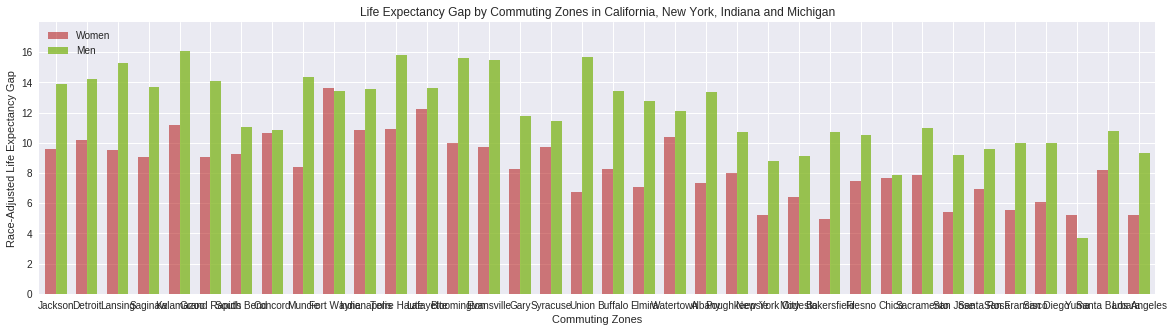

In [41]:
# Setting the positions and width for the bars
pos = list(range(len(tb7['czname'])))
width = 0.35

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

# Create a bar with women data,
# in position pos,
plt.bar(pos,
        tb7['gap_F'],
        width,
        alpha=0.6,
        color='#b72626',
        label='Women')

# Create a bar with men data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        tb7['gap_M'],
        width,
        alpha=0.8,
        color='#83b726',
        label='Men')

# Set the x,y axis label
ax.set_xlabel('Commuting Zones')
ax.set_ylabel('Race-Adjusted Life Expectancy Gap')

# Set the chart's title
ax.set_title('Life Expectancy Gap by Commuting Zones in California, New York, Indiana and Michigan')

# Set the position of the x ticks
ax.set_xticks([p + width/2 for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(tb7['czname'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0,18])
plt.yticks(np.arange(0, 18, 2))

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.show()

In [42]:
n = list(range(len(tb7['czname'])))
index = [i+1 for i in n]

In [43]:
# 5 CZs with the highest Men life expectancy gap in California, New York, Indiana and Michigan
stb7 = tb7.sort_values(by='gap_M', ascending=False).reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_M']].head(5)

,statename,czname,gap_M
1,Indiana,Terre Haute,15.82364
2,New York,Union,15.66260
3,Indiana,Bloomington,15.61690
4,Indiana,Evansville,15.46764
5,Michigan,Lansing,15.31108


In [44]:
# 5 CZs with the highest Women life expectancy gap in California, New York, Indiana and Michigan
stb7 = tb7.sort_values(by='gap_F', ascending=False).reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_F']].head(5)

,statename,czname,gap_F
1,Indiana,Lafayette,12.22876
2,Michigan,Kalamazoo,11.20880
3,Indiana,Terre Haute,10.94084
4,Indiana,Indianapolis,10.82229
5,Indiana,Concord,10.62655


In [45]:
# 5 CZs with the lowest Men life expectancy gap in California, New York, Indiana and Michigan
stb7 = tb7.sort_values(by='gap_M').reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_M']].head(5)

,statename,czname,gap_M
1,California,Chico,7.84758
2,New York,New York City,8.82618
3,California,Modesto,9.10118
4,California,San Jose,9.22374
5,California,Los Angeles,9.32232


In [46]:
# 5 CZs with the lowest Women life expectancy gap in California, New York, Indiana and Michigan
stb7 = tb7.sort_values(by='gap_F').reset_index()
stb7.reindex(index)[['statename', 'czname', 'gap_F']].head(5)

,statename,czname,gap_F
1,California,Los Angeles,5.19068
2,New York,New York City,5.20648
3,California,Yuma,5.21239
4,California,San Jose,5.41566
5,California,San Francisco,5.54166
